In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
%matplotlib inline

In [12]:
start= datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)

In [16]:
df=pd.read_pickle('/kaggle/input/finance-data-of-banks/all_banks')

In [17]:
df.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker           ...     MS                                  WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98   
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  
2006-01-05   31.31  31.50  10158000  
2006-01-06   31.38  31.68   8403800  
2006-01-09   31.56  31.68   5619600  

[5 rows x 30 columns]

In [18]:
tickers=['BAC','C','GS','JPM','MS','WFC']

In [23]:
for tick in tickers:
    print(tick,df[tick]['Close'].max())

BAC 54.9
C 564.1
GS 247.92
JPM 70.08
MS 89.3
WFC 58.52


In [26]:
df.xs(key='Close',axis=1,level=1).max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

In [44]:
returns=pd.DataFrame()

In [45]:
for tick in tickers:
    returns[tick+'Reutrn']= df[tick]['Close'].pct_change()

In [46]:
returns.head()

,BACReutrn,CReutrn,GSReutrn,JPMReutrn,MSReutrn,WFCReutrn
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

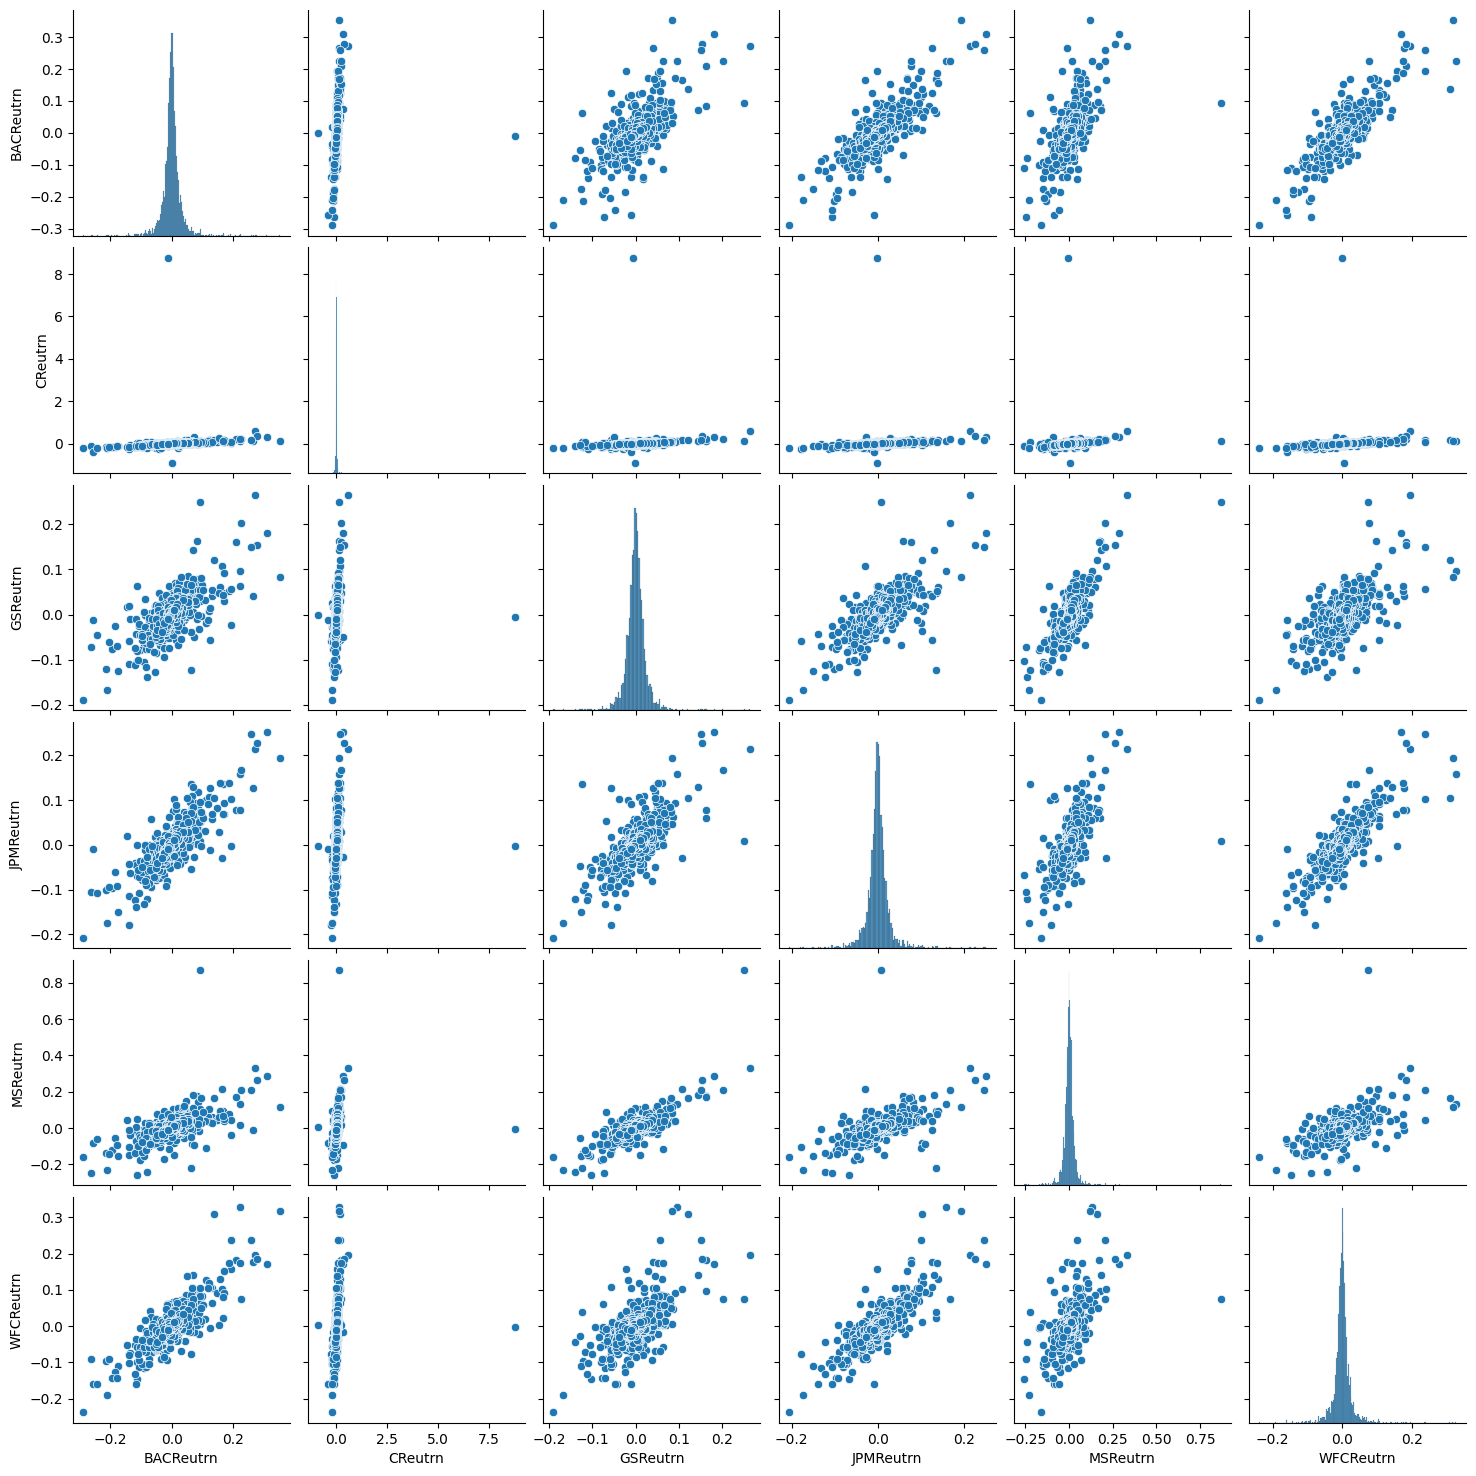

In [50]:
sns.pairplot(returns[1:])

In [53]:
returns.idxmin()

BACReutrn   2009-01-20
CReutrn     2011-05-06
GSReutrn    2009-01-20
JPMReutrn   2009-01-20
MSReutrn    2008-10-09
WFCReutrn   2009-01-20
dtype: datetime64[ns]

In [54]:
returns.std()

BACReutrn    0.036650
CReutrn      0.179969
GSReutrn     0.025346
JPMReutrn    0.027656
MSReutrn     0.037820
WFCReutrn    0.030233
dtype: float64

In [62]:
returns2015=returns.reset_index()[returns.reset_index()['Date'].dt.year==2015]

/tmp/ipykernel_33/2409689814.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(returns2015['MSReutrn'],bins=50)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='MSReutrn', ylabel='Density'>

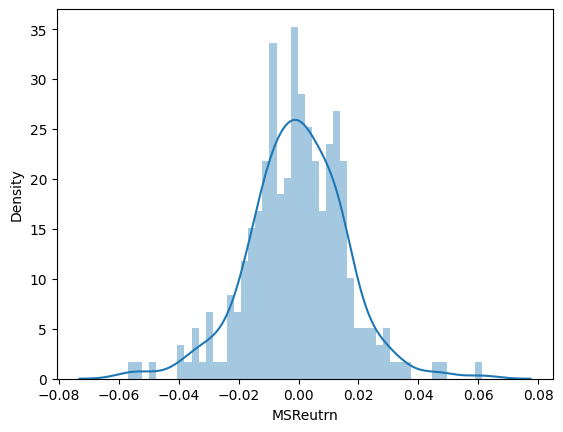

In [63]:
sns.distplot(returns2015['MSReutrn'],bins=50)

NameError: name 'plt' is not defined

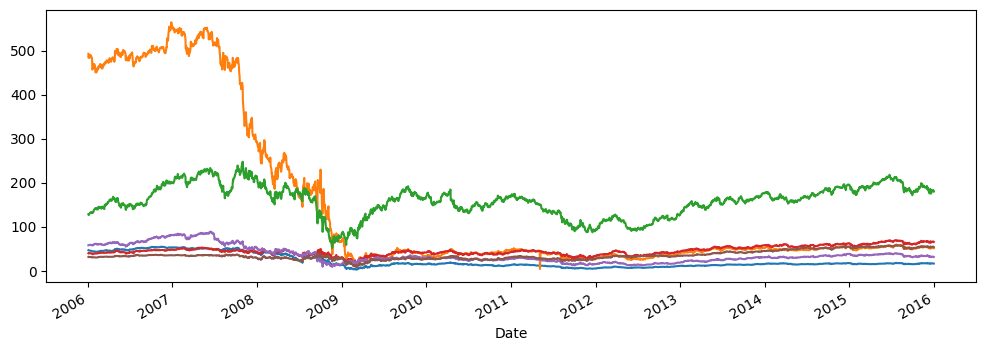

In [67]:
for tick in tickers:         
    df[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend() 

<Axes: xlabel='Date'>

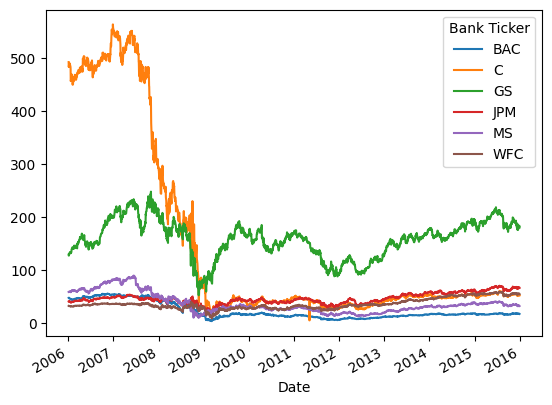

In [68]:
df.xs(key='Close',axis=1,level='Stock Info').plot()

NameError: name 'plt' is not defined

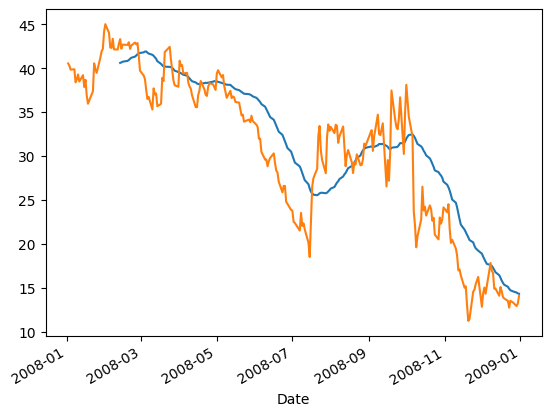

In [69]:
df['BAC']['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
df['BAC']['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC Close')
plt.legend()

<Axes: xlabel='Bank Ticker', ylabel='Bank Ticker'>

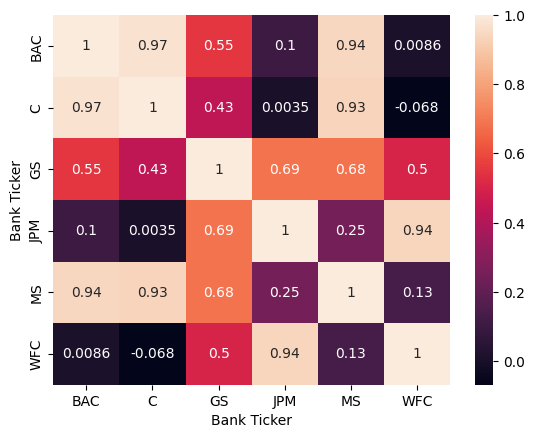

In [70]:
sns.heatmap(df.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

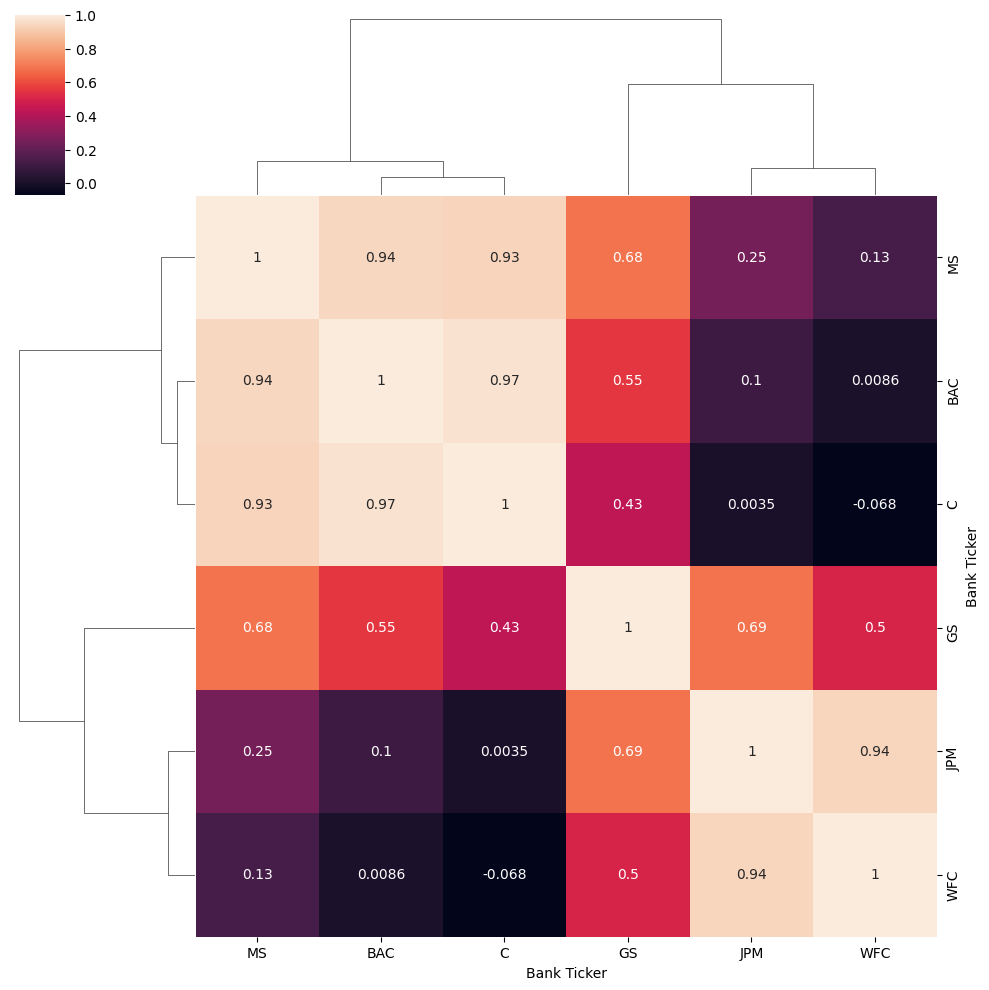

In [71]:
sns.clustermap(df.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)